# The dataset chosen for analysis was Loan Data from Prosper

## Investigation Overview
The effect of various numeric and categorical variables on Loan status were analyzed. Furthermore existing correlation  
where also studied

## Data Set Overview
Initiall the dataset was very large having different types of variables. It was cleaned in the prewrangling phase. Even after that only few of the relevant variables were studied in detail to gauge their effects and correlation

## Summary and Insights
1)50,000-74,999 Income Range has the highest loan counts  
2)CA has the highest loan counts  
3)Most loans are in the current state  
4)Loan Original Amount seems to have a strong positive correlation with Monthly Loan Payment and Loan Original Amount has a strong negative correlation with borrower rate  
5)Loan Original Amount is higher and more spread out for Employed people  
6)Monthly States Income is higher for self-employed people  
7)Loan Originial Amount and Stated monthly income does not show much variation for prosper rating (alpha)  
8)Maximum Loan original Amount is higher for Income range over 100,000+ and also in that case more spread out  
9)Irrespective of Income Range B prosper rating people have higher loan amounts thus income range does not have any effect  on prosper rating  
10)In most of the employment statuses prosper rating is seen to depend on stated monthly income  
11)With Higher income range stated monthly income increase accross all Prosper Ratings


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.pyplot import xticks
import warnings
warnings.filterwarnings('ignore')

% matplotlib inline

In [2]:
df=pd.read_csv("prosperLoanData.csv")
df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
df['PercentFunded'].value_counts()

1.0000    113067
0.9998         5
0.7000         4
0.8087         4
0.7784         3
0.7189         3
0.9086         3
0.7395         3
0.7142         3
0.7803         3
0.7032         3
0.7063         3
0.7458         3
0.7092         3
0.7059         3
0.7145         3
0.8055         3
0.7049         3
0.7168         3
0.7020         3
0.9999         3
0.7099         3
0.7039         2
0.8116         2
0.8109         2
0.7487         2
0.8515         2
0.7019         2
0.8741         2
0.7197         2
           ...  
0.7250         1
0.7917         1
0.8636         1
0.7935         1
0.9132         1
0.7391         1
0.9524         1
0.9106         1
0.7211         1
0.7478         1
0.7289         1
0.9555         1
0.7849         1
0.7999         1
0.8910         1
0.8133         1
0.9113         1
0.8685         1
0.8549         1
0.7936         1
0.8882         1
0.8725         1
0.8126         1
0.7095         1
0.9963         1
0.8167         1
0.7854         1
0.7903        

In [5]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


From the describe table it can be inferred that probability to get funded in general is high as denoted by column "PercentFunded"

In [6]:
print("number of rows :{}, Number of columns: {} ".format(df.shape[0],df.shape[1]))

number of rows :113937, Number of columns: 81 


only a portion of the datasets would be looked at for exploration since it is not possible to analyze so many columns thus few of the columns selected

In [7]:
cols_up=['LoanStatus','Term' ,'LoanOriginationQuarter',  'BorrowerAPR' , 'BorrowerRate','EstimatedEffectiveYield' ,'ProsperRating (numeric)',
'ProsperRating (Alpha)','ListingCategory (numeric)','ProsperScore','EmploymentStatus','Occupation','OpenCreditLines',
'EmploymentStatusDuration','IsBorrowerHomeowner','IncomeVerifiable','StatedMonthlyIncome','IncomeRange','MonthlyLoanPayment',
'DebtToIncomeRatio','Recommendations','LoanOriginalAmount' ,'PercentFunded','Investors','InvestmentFromFriendsAmount',
'BorrowerState']

In [8]:
len(cols_up)

26

So the number of columns was reduced to relevant 26 columns from orginal 81 columns

In [9]:
### Slicing the orginal dataframe such that it has only the above columns
df1=df[cols_up]

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 26 columns):
LoanStatus                     113937 non-null object
Term                           113937 non-null int64
LoanOriginationQuarter         113937 non-null object
BorrowerAPR                    113912 non-null float64
BorrowerRate                   113937 non-null float64
EstimatedEffectiveYield        84853 non-null float64
ProsperRating (numeric)        84853 non-null float64
ProsperRating (Alpha)          84853 non-null object
ListingCategory (numeric)      113937 non-null int64
ProsperScore                   84853 non-null float64
EmploymentStatus               111682 non-null object
Occupation                     110349 non-null object
OpenCreditLines                106333 non-null float64
EmploymentStatusDuration       106312 non-null float64
IsBorrowerHomeowner            113937 non-null bool
IncomeVerifiable               113937 non-null bool
StatedMonthlyIncome         

In [11]:
df1.head()

,LoanStatus,Term,LoanOriginationQuarter,BorrowerAPR,BorrowerRate,EstimatedEffectiveYield,ProsperRating (numeric),ProsperRating (Alpha),ListingCategory (numeric),ProsperScore,...,StatedMonthlyIncome,IncomeRange,MonthlyLoanPayment,DebtToIncomeRatio,Recommendations,LoanOriginalAmount,PercentFunded,Investors,InvestmentFromFriendsAmount,BorrowerState
0,Completed,36,Q3 2007,0.16516,0.1580,NaN,NaN,NaN,0,NaN,...,3083.333333,"$25,000-49,999",330.43,0.17,0,9425,1.0,258,0.0,CO
1,Current,36,Q1 2014,0.12016,0.0920,0.07960,6.0,A,2,7.0,...,6125.000000,"$50,000-74,999",318.93,0.18,0,10000,1.0,1,0.0,CO
2,Completed,36,Q1 2007,0.28269,0.2750,NaN,NaN,NaN,0,NaN,...,2083.333333,Not displayed,123.32,0.06,0,3001,1.0,41,0.0,GA
3,Current,36,Q4 2012,0.12528,0.0974,0.08490,6.0,A,16,9.0,...,2875.000000,"$25,000-49,999",321.45,0.15,0,10000,1.0,158,0.0,GA
4,Current,36,Q3 2013,0.24614,0.2085,0.18316,3.0,D,2,4.0,...,9583.333333,"$100,000+",563.97,0.26,0,15000,1.0,20,0.0,MN


In [12]:
### Removing all the Null values

In [13]:
df1=df1.dropna()

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 26 columns):
LoanStatus                     76216 non-null object
Term                           76216 non-null int64
LoanOriginationQuarter         76216 non-null object
BorrowerAPR                    76216 non-null float64
BorrowerRate                   76216 non-null float64
EstimatedEffectiveYield        76216 non-null float64
ProsperRating (numeric)        76216 non-null float64
ProsperRating (Alpha)          76216 non-null object
ListingCategory (numeric)      76216 non-null int64
ProsperScore                   76216 non-null float64
EmploymentStatus               76216 non-null object
Occupation                     76216 non-null object
OpenCreditLines                76216 non-null float64
EmploymentStatusDuration       76216 non-null float64
IsBorrowerHomeowner            76216 non-null bool
IncomeVerifiable               76216 non-null bool
StatedMonthlyIncome            76216 non-

Now checking the categorcal columns

In [15]:
df1['Term']=df1['Term'].astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 26 columns):
LoanStatus                     76216 non-null object
Term                           76216 non-null category
LoanOriginationQuarter         76216 non-null object
BorrowerAPR                    76216 non-null float64
BorrowerRate                   76216 non-null float64
EstimatedEffectiveYield        76216 non-null float64
ProsperRating (numeric)        76216 non-null float64
ProsperRating (Alpha)          76216 non-null object
ListingCategory (numeric)      76216 non-null int64
ProsperScore                   76216 non-null float64
EmploymentStatus               76216 non-null object
Occupation                     76216 non-null object
OpenCreditLines                76216 non-null float64
EmploymentStatusDuration       76216 non-null float64
IsBorrowerHomeowner            76216 non-null bool
IncomeVerifiable               76216 non-null bool
StatedMonthlyIncome            76216 n

In [16]:
type(df1.iloc[1,1])

numpy.int64

Seperating columns into numerical and categorical coulmn and boolean columns

In [17]:
cat_df_col=df1.loc[:,(df1.dtypes=='object')|(df1.dtypes=='category')]
num_df_col=df1.loc[:,(df1.dtypes==np.int64)|(df1.dtypes==np.float64)]
bool_df_col=df1.loc[:,(df1.dtypes=='bool')]

In [18]:
cat_df_col.columns

Index(['LoanStatus', 'Term', 'LoanOriginationQuarter', 'ProsperRating (Alpha)',
       'EmploymentStatus', 'Occupation', 'IncomeRange', 'BorrowerState'],
      dtype='object')

In [19]:
num_df_col.columns

Index(['BorrowerAPR', 'BorrowerRate', 'EstimatedEffectiveYield',
       'ProsperRating (numeric)', 'ListingCategory (numeric)', 'ProsperScore',
       'OpenCreditLines', 'EmploymentStatusDuration', 'StatedMonthlyIncome',
       'MonthlyLoanPayment', 'DebtToIncomeRatio', 'Recommendations',
       'LoanOriginalAmount', 'PercentFunded', 'Investors',
       'InvestmentFromFriendsAmount'],
      dtype='object')

In [20]:
bool_df_col.columns

Index(['IsBorrowerHomeowner', 'IncomeVerifiable'], dtype='object')

## What is the structure of your dataset ?

Initially the dataset had 113937 rows and 81 columns. Then out of those 81 columns 26 relevant columns were selected. After that the rows with NA values were dropped which made the final structure as 76216 rows and 26 columns

## What is/are the main feature(s) of interest in your dataset?

The main feature of interest is Loan Status according to me. I would check the effect of other parameters on the main feature.

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I believe Borrower APR,StatedMonthlyIncome,EmploymentStatus,EmploymentStatusDuration,ProsperRating (Alpha),EmploymentStatusDuration will have strong effect on Loan Status 

# Univariate Exploration

### Categorical Parameter Analysis

In [21]:
df1['Term'].value_counts()

36    51919
60    22883
12     1414
Name: Term, dtype: int64

In [22]:
df1['LoanOriginationQuarter'].value_counts()

Q4 2013    12834
Q1 2014    10673
Q3 2013     8675
Q2 2013     6642
Q3 2012     5091
Q2 2012     4490
Q4 2012     4042
Q1 2012     3854
Q4 2011     3405
Q1 2013     3287
Q3 2011     2742
Q2 2011     2202
Q1 2011     1575
Q4 2010     1397
Q2 2010     1326
Q4 2009     1265
Q3 2010     1113
Q1 2010     1083
Q3 2009      520
Name: LoanOriginationQuarter, dtype: int64

In [23]:
df1['ProsperRating (Alpha)'].value_counts()

C     16499
B     14379
A     13490
D     12629
E      8443
HR     5680
AA     5096
Name: ProsperRating (Alpha), dtype: int64

In [24]:
df1['EmploymentStatus'].value_counts()

Employed         65883
Full-time         7577
Other             2194
Retired            320
Part-time          199
Self-employed       42
Not employed         1
Name: EmploymentStatus, dtype: int64

In [25]:
df1['Occupation'].value_counts()

Other                                 18501
Professional                           9916
Executive                              3206
Computer Programmer                    3038
Teacher                                2777
Analyst                                2683
Administrative Assistant               2603
Accountant/CPA                         2413
Nurse (RN)                             2121
Clerical                               2059
Skilled Labor                          2033
Sales - Commission                     1982
Retail Management                      1900
Sales - Retail                         1724
Police Officer/Correction Officer      1273
Truck Driver                           1218
Laborer                                1162
Civil Service                          1131
Engineer - Mechanical                  1098
Construction                           1052
Food Service Management                 935
Engineer - Electrical                   873
Medical Technician              

In [26]:
df1['IncomeRange'].value_counts()

$50,000-74,999    23692
$25,000-49,999    21421
$100,000+         13977
$75,000-99,999    13547
$1-24,999          3578
Not employed          1
Name: IncomeRange, dtype: int64

In [27]:
df1['BorrowerState'].value_counts()

CA    9574
NY    5184
TX    5086
FL    4738
IL    3871
OH    3061
GA    3006
VA    2530
NJ    2463
PA    2416
MI    2349
NC    2194
MD    2066
WA    1925
MA    1696
MO    1590
MN    1554
CO    1539
IN    1518
TN    1396
CT    1371
WI    1359
AZ    1237
AL    1085
OR    1045
NV     916
SC     872
KY     804
KS     775
LA     768
AR     689
OK     665
MS     600
NE     496
UT     441
NH     410
RI     376
ID     348
DC     310
HI     307
NM     293
WV     274
DE     253
MT     192
SD     165
VT     151
AK     150
WY     108
Name: BorrowerState, dtype: int64

### Checking the above categorical variables it can be seen that 'ProsperRating (Alpha)'and 'IncomeRange' are ordinal variables so they need to be modified

In [28]:
ordinal_variable_dictionary = {'ProsperRating (Alpha)': ['AA','A', 'B', 'C', 'D', 'E', 'HR'],
                    'IncomeRange': ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']}

for var in ordinal_variable_dictionary:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_variable_dictionary[var])
    df1[var] = df1[var].astype(ordered_var)

## Vissualization of Important Categorical Variables

Text(0.5,1,'Loan Count vs Prosper Rating Alpha')

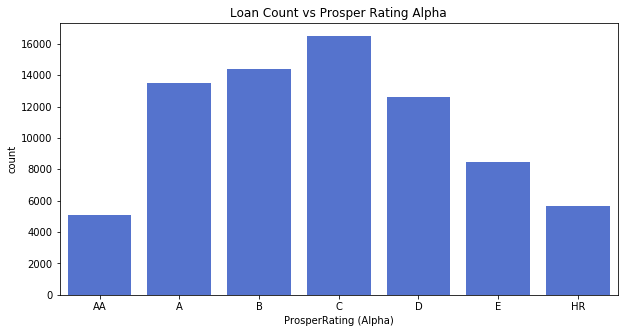

In [29]:
##Prosper Rating(Alpha) of Borrowers ordered
plt.figure(figsize = [10, 5]) 
sb.countplot(data = df1, x = 'ProsperRating (Alpha)',color="royalblue");
plt.title("Loan Count vs Prosper Rating Alpha")

## Vissualizations

## Loan Count Vs InCome Range 
Income Range of (50000 - 74999) has the highest loan count

Text(0.5,1,'Loan Count vs Income Range')

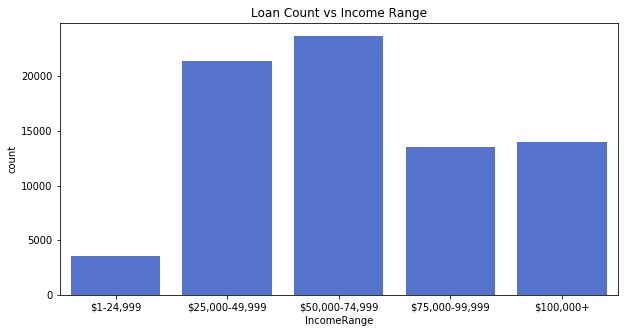

In [30]:
## Income Range ordered 
plt.figure(figsize = [10, 5]) 
sb.countplot(data = df1, x = 'IncomeRange',color="royalblue");
plt.title("Loan Count vs Income Range")

## Loan Counts Vs State
California State has the highest Loan Counts

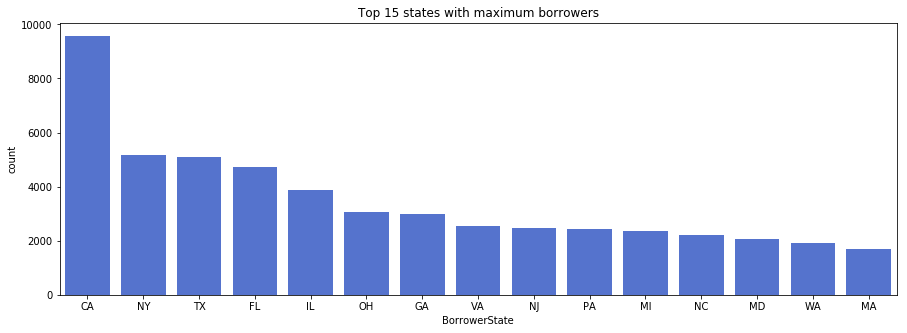

In [31]:
# State of Borrowers 
plt.figure(figsize = [15, 5]) 
sb.countplot(data = df1, x = 'BorrowerState', color = 'royalblue',
             order = df1['BorrowerState'].value_counts().head(15).index );
plt.title("Top 15 states with maximum borrowers");

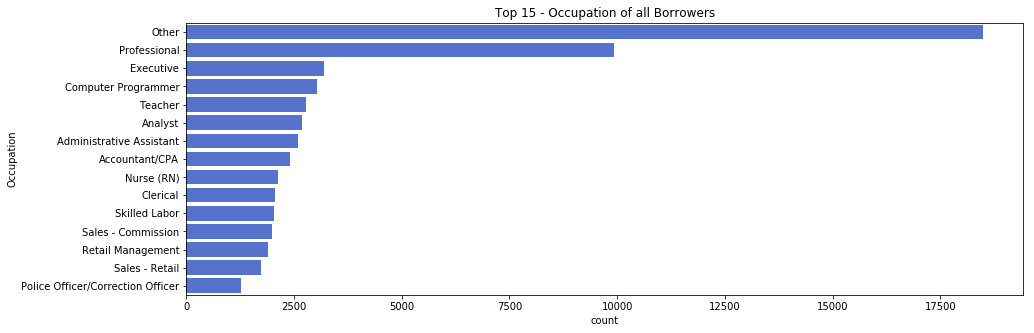

In [32]:
# Occupation of Borrowers 
plt.figure(figsize = [15, 5]) 
sb.countplot(data = df1, y = 'Occupation', color ="royalblue",
             order = df1['Occupation'].value_counts().head(15).index );
plt.title("Top 15 - Occupation of all Borrowers");

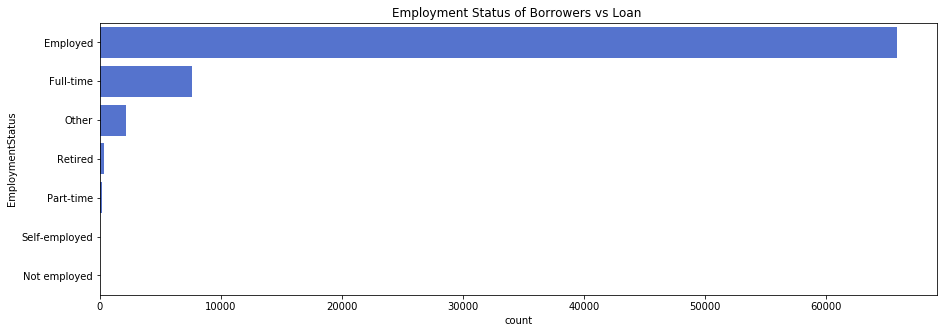

In [33]:
# Employer Status of Borrowers 
plt.figure(figsize = [15, 5]) 
sb.countplot(data = df1, y = 'EmploymentStatus', color ="royalblue",order = df1['EmploymentStatus'].value_counts().index);
plt.title("Employment Status of Borrowers vs Loan ");

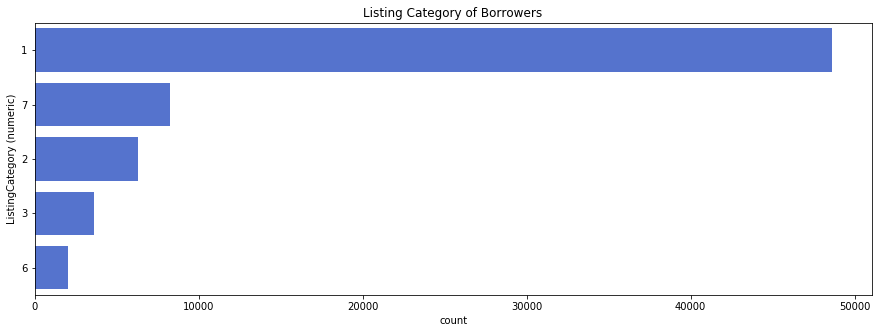

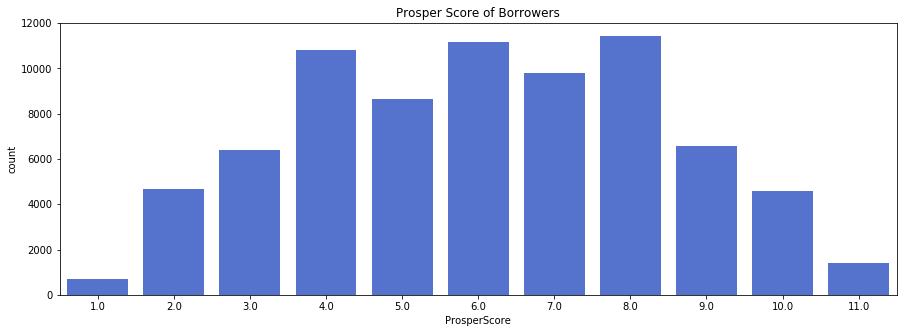

In [34]:
### ListingCategory (numeric),'ProsperScore' are also categoric in nature so checking them
# Employer Status of Borrowers 
plt.figure(figsize = [15, 5]) 
sb.countplot(data = df1, y = 'ListingCategory (numeric)', color ="royalblue",order = df1['ListingCategory (numeric)'].value_counts().head(5).index);
plt.title("Listing Category of Borrowers");
plt.figure(figsize = [15, 5]) 
sb.countplot(data = df1, x = 'ProsperScore', color ="royalblue");
plt.title("Prosper Score of Borrowers");


## Loan Status vs Loan Counts
From the chart it can be seen most of the loans are in current status

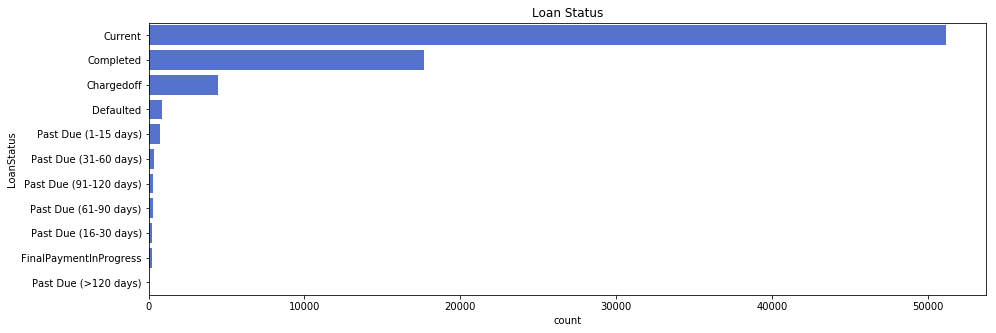

In [35]:
## Loan Status of Borrowers
plt.figure(figsize = [15, 5]) 
sb.countplot(data = df1, y= 'LoanStatus', color ="royalblue",order = df1['LoanStatus'].value_counts().index);
plt.title("Loan Status");

### Summary of Categorical Parameter Analysis

1)Lesser number of loans have **AA** prosper rating  
2)**50,000-74,999** Income Range has the highest loan counts  
3)**CA** has the highest loan counts  
4)Indivdiaully **Professional** occupation type has the highest loan counts  
5)People with employment status **Employed** have the highest loan counts  
6)Listing Category 1  have the highest loan counts  
7)Prosper Score 8 has the highest count  
8)Most loans are in the **current** state

### Vissualization of Important Numeric Variable Analysis

Now the variables to consider 'BorrowerAPR', 'BorrowerRate', 'EstimatedEffectiveYield','ProsperRating (numeric)',, 'OpenCreditLines', 'EmploymentStatusDuration', 'StatedMonthlyIncome','MonthlyLoanPayment','DebtToIncomeRatio','Recommendations','LoanOriginalAmount', 'PercentFunded', 'Investors','InvestmentFromFriendsAmount'

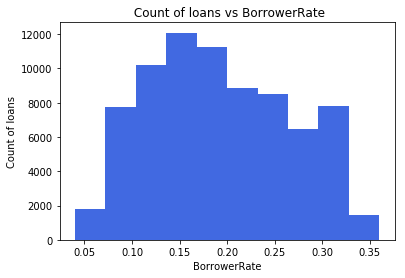

In [36]:
plt.hist(data = df1, x = 'BorrowerRate',color="royalblue");
plt.xlabel('BorrowerRate');
plt.ylabel('Count of loans');
plt.title(" Count of loans vs BorrowerRate");

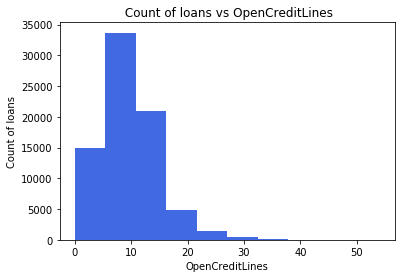

In [37]:
plt.hist(data = df1, x = 'OpenCreditLines',color="royalblue");
plt.xlabel('OpenCreditLines');
plt.ylabel('Count of loans');
plt.title(" Count of loans vs OpenCreditLines");

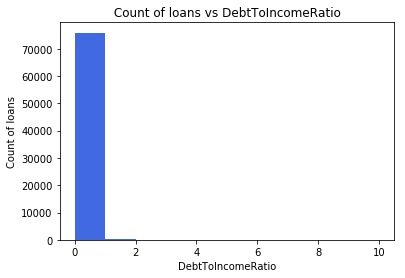

In [38]:
plt.hist(data = df1, x = 'DebtToIncomeRatio',color="royalblue");
plt.xlabel('DebtToIncomeRatio');
plt.ylabel('Count of loans');
plt.title(" Count of loans vs DebtToIncomeRatio ");

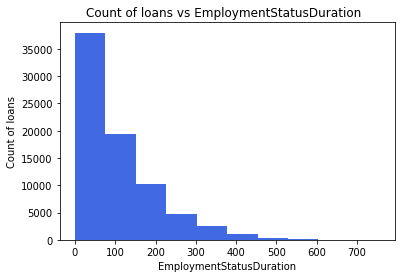

In [39]:
plt.hist(data = df1, x = 'EmploymentStatusDuration',color="royalblue");
plt.xlabel('EmploymentStatusDuration');
plt.ylabel('Count of loans');
plt.title("Count of loans vs EmploymentStatusDuration  ");

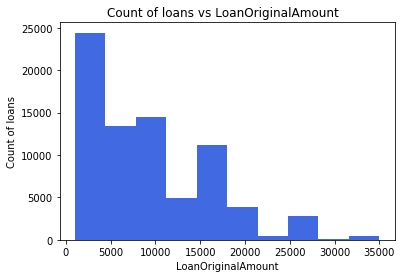

In [40]:
plt.hist(data = df1, x = 'LoanOriginalAmount',color="royalblue");
plt.xlabel('LoanOriginalAmount');
plt.ylabel('Count of loans');
plt.title("Count of loans vs LoanOriginalAmount  ");

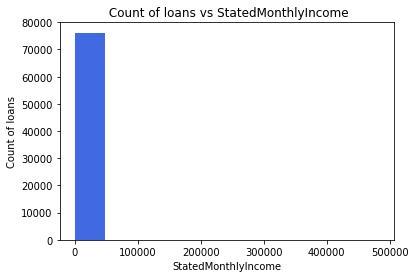

In [41]:
plt.hist(data = df1, x = 'StatedMonthlyIncome',color="royalblue");
plt.xlabel('StatedMonthlyIncome');
plt.ylabel('Count of loans');
plt.title(" Count of loans vs StatedMonthlyIncome");

In [42]:
df1['StatedMonthlyIncome'].describe()

count     76216.000000
mean       6002.833586
std        5110.743506
min           0.250000
25%        3583.333333
50%        5041.666667
75%        7250.000000
max      483333.333333
Name: StatedMonthlyIncome, dtype: float64

The axis of the above graph needs to be fixed for better analysis 

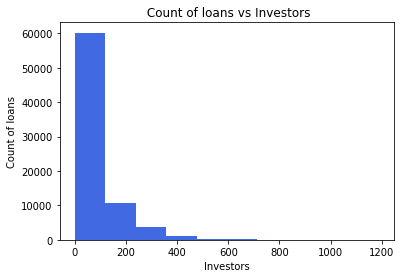

In [43]:
plt.hist(data = df1, x = 'Investors',color="royalblue");
plt.xlabel('Investors');
plt.ylabel('Count of loans');
plt.title(" Count of loans vs Investors");

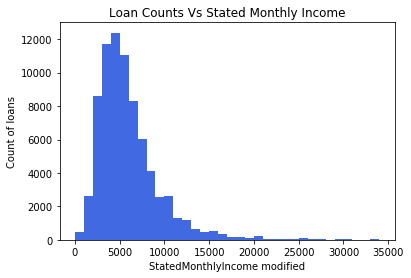

In [44]:
df1_sub = df1[df1['StatedMonthlyIncome'] <=30000]
bin_tick = np.arange(0, df1_sub['StatedMonthlyIncome'].max()+5000, 1000)
plt.hist(data = df1, x = 'StatedMonthlyIncome', bins = bin_tick,color="royalblue");
plt.xlabel('StatedMonthlyIncome modified');
plt.ylabel('Count of loans');
plt.title("Loan Counts Vs Stated Monthly Income");

### Summary of Numeric Parameter Analyxis 

1)Borrow Rate of 0.15 has the highest loan counts  
2)Open Credit lines equal to around 10 have the highest loan counts  
3)Debt to Income ratio between 0 to 1 has the highest loan counts  
4)Employment Status below 100 shows higher loan counts  
5)The highest loan counts are within 5000
6)Sated Monthly income of around 5000 show the highest loan counts alo majority of the loan takers earn less than 10000


## Bivariate Exploration 

## First Exploring relationships between Numeric Variables

Considering Numeric Variables analyzed in the last section 'Borrower Rate','Open Credit Lines','Debt to Income Ratio','EmploymentStatusDuration','StatedMonthlyIncome','Investors','LoanOriginalAmount','DebtToIncomeRatio'

In [45]:
numeric_up=['BorrowerRate','OpenCreditLines','DebtToIncomeRatio','EmploymentStatusDuration','StatedMonthlyIncome','Investors','LoanOriginalAmount','MonthlyLoanPayment']

## Correlation between Numeric Variable
Loan Original Amount seems to have a strong positive correlation with Monthly Loan Payment and Loan Original Amount has a strong negative correlation with borrower rate

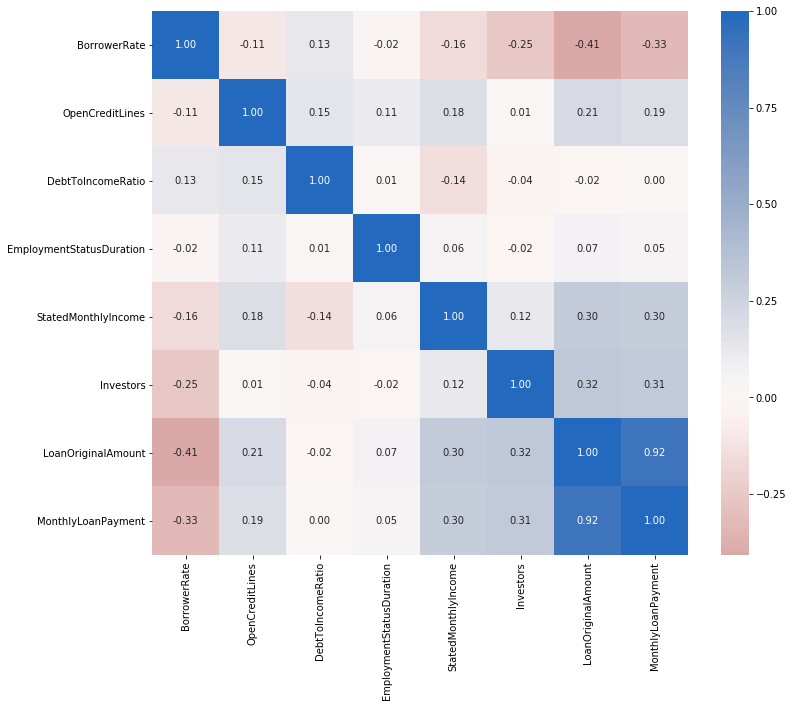

In [46]:
# Plotting correlation plot
plt.figure(figsize = [12, 10])
sb.heatmap(df1[numeric_up].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

## Now Exploring relationships between categorical and numerical variables

In [47]:
cat_up=['ProsperRating (Alpha)','IncomeRange','Occupation','EmploymentStatus','BorrowerState']##Considering categorical variables which are important

## Multivariate Analysis using box plot
Loan Original Amount is higher and more spread out for Employed people  
Monthly States Income is higher for self-employed people  
Loan Originial Amount and Stated monthly income does not show much variation for prosper rating (alpha)  
Maximum Loan original Amount is higher for Income range over 100,000+ and also in that case more spread out

<Figure size 720x576 with 0 Axes>

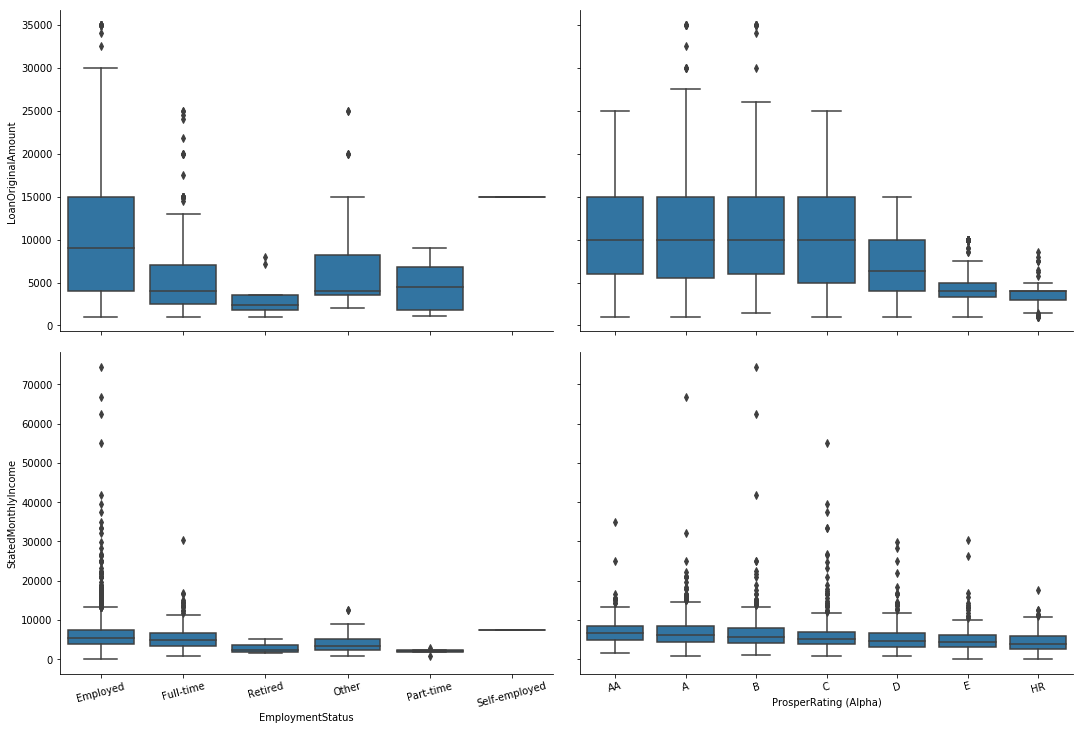

In [48]:
 
## Plotting numeric variables  'LoanOriginalAmount', 'StatedMonthlyIncome' vs categoric variables 'Employment Status' and 'ProsperRating (Alpha)'
cat_1 = ['EmploymentStatus', 'ProsperRating (Alpha)']
samples = np.random.choice(df1.shape[0], 5000, replace = False)
df1_samp = df1.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """##Taking inspiration from diamond example file in class room

    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation = 15)
    

plt.figure(figsize = [10, 8])
g = sb.PairGrid(data = df1_samp, y_vars = [ 'LoanOriginalAmount', 'StatedMonthlyIncome'], 
                x_vars = cat_1, size = 5, aspect = 1.5)

g.map(boxgrid);
plt.xticks(rotation = 15)
plt.show();

Text(0.5,1,'Loan Amount vs Income Range')

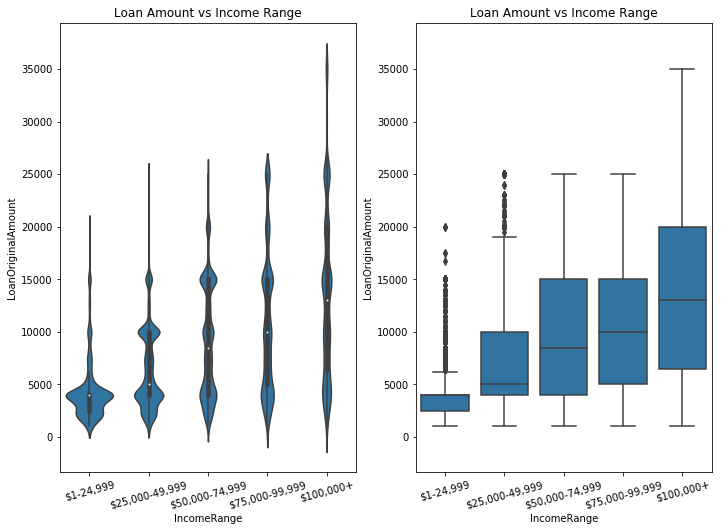

In [49]:
df1_sub = df1[(df1['StatedMonthlyIncome'] <= 20000) ]## Restricting the income
df1_sub = df1_sub[df1_sub['IncomeRange'] != 'Not employed']###Not employed need not be conidered


plt.figure(figsize = [11.69, 8.27])
base_color = sb.color_palette()[0]

# Violin Plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df1_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.xticks(rotation = 15);
plt.title('Loan Amount vs Income Range')

# box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df1_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation = 15);
plt.title('Loan Amount vs Income Range')

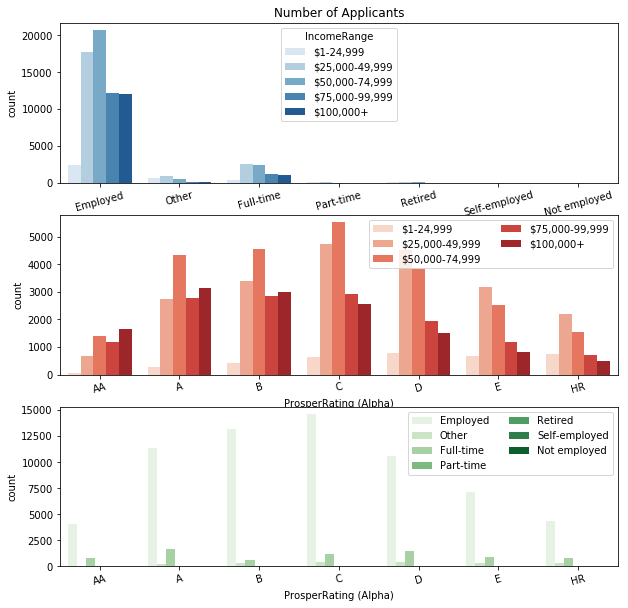

In [50]:
## now plotting subplots
plt.figure(figsize = [10, 10])

# subplot 1: Employment Status vs Income Range
plt.subplot(3, 1, 1)
sb.countplot(data = df1_sub, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Blues')
plt.xticks(rotation = 15)
plt.title('Number of Applicants')

# subplot 2: ProsperRating_Alpha vs. IncomeRange
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df1_sub, x = 'ProsperRating (Alpha)', hue = 'IncomeRange', palette = 'Reds')
ax.legend(ncol = 2) # to reduce overlapping
plt.xticks(rotation = 15)


# subplot 3: ProsperRating_Alpha vs. EmploymentStatus
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df1_sub, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette = 'Greens')##different color
ax.legend(loc = 1, ncol = 2) #remove overlapping
plt.xticks(rotation = 15)


plt.show()

### Summary of Bivariate Exploration 

1)Loan Original Amount seems to have a strong positive correlation with Monthly Loan Payment and Loan Original Amount has a strong negative correlation with borrower rate  
2)Loan Original Amount is higher and more spread out for Employed people  
3)Monthly States Income is higher for self-employed people  
4)Loan Originial Amount and Stated monthly income does not show much variation for prosper rating (alpha)  
5)Maximum Loan original Amount is higher for Income range over 100,000+ and also in that case more spread out  

## Multivariate Exploration
Irrespective of Income Range B prosper rating people have higher loan amounts thus income range does not have any effect on prosper rating  
In most of the employment statuses prosper rating is seen to depend on stated monthly income  
With Higher income range stated monthly income increase accross all Prosper Ratings

### Does Income Range affect Prosper Rating ??

Text(0.5,1,'Applicants - Loan Amount across Prosper Rating and Income Range')

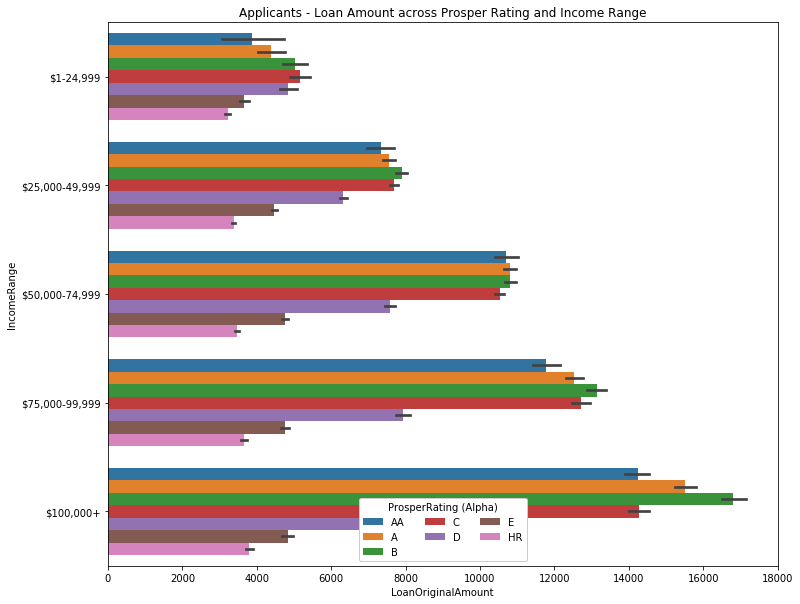

In [51]:
plt.figure(figsize = [12,10])

ax = sb.barplot(data = df1_sub, x = 'LoanOriginalAmount', y = 'IncomeRange', hue = 'ProsperRating (Alpha)')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'ProsperRating (Alpha)',prop={'size': 10})
plt.title('Applicants - Loan Amount across Prosper Rating and Income Range')

### Does Stated monthly income affect Prosper Rating ?

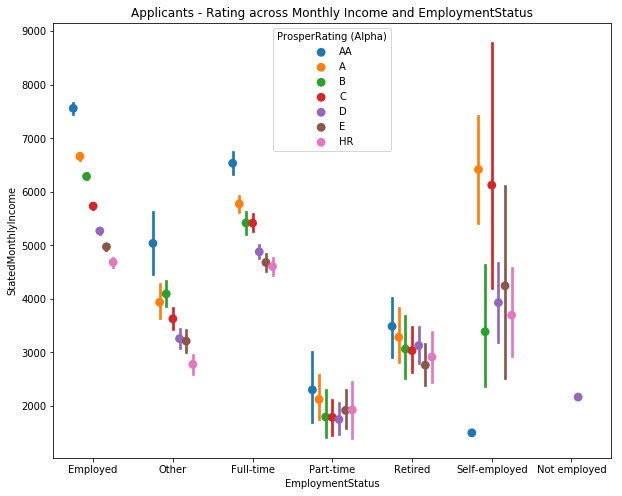

In [52]:
plt.figure(figsize = [10,8])
ax = sb.pointplot(data = df1_sub, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', hue = 'ProsperRating (Alpha)',
                  dodge = 0.5, linestyles = "")
plt.title('Applicants - Rating across Monthly Income and EmploymentStatus');

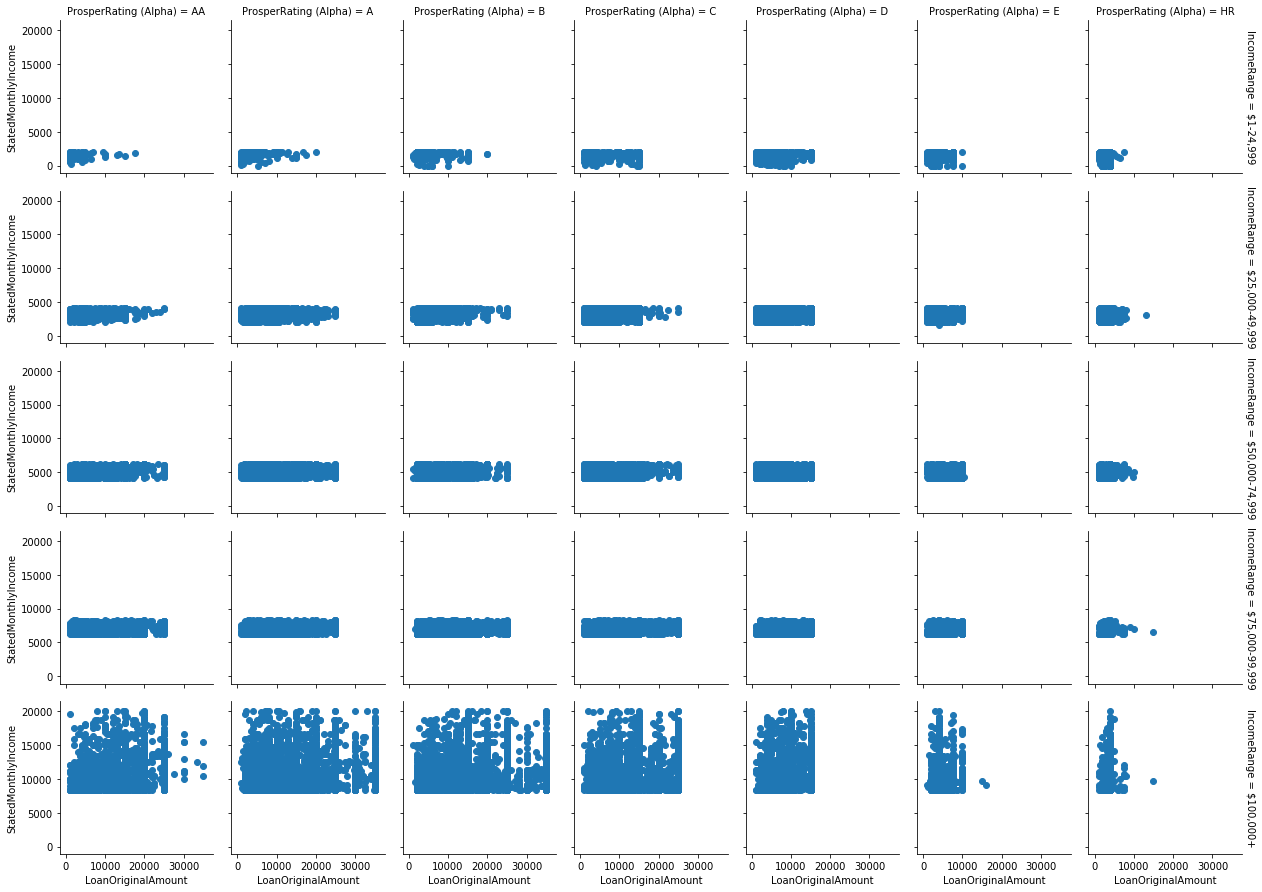

In [53]:
g = sb.FacetGrid(data = df1_sub, col = 'ProsperRating (Alpha)', row = 'IncomeRange', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'LoanOriginalAmount', 'StatedMonthlyIncome');

### Summary of Multivariate Exploration

1)Irrespective of Income Range B prosper rating people have higher loan amounts thus income range does not have any effect on prosper rating  
2)In most of the employment statuses prosper rating is seen to depend on stated monthly income  
3)With Higher income range stated monthly income increase accross all Prosper Ratings 

In [ ]:
!jupyter nbconvert "Explanatory Data An _Slide_deck.ipynb" --to slides --post serve --template output_toggle